In [6]:
import pandas as pd
from time import time
import re
from collections import namedtuple, Counter
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
import random
import json
from scipy.stats import skew, kurtosis,linregress
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def n_appearances(word,token_counter):
    try:
        return token_counter[word]
    except:
        return 0

# 2.1 Profanity

importing dataset...

In [17]:
song_df=pd.read_csv("../Data/songdata_clean.csv",sep=',',encoding='utf-8')
song_df.drop(['Unnamed: 0'],axis=1,inplace=True)
song_df.index=list(range(len(song_df)))
print(len(song_df))
song_df.head()

56148


,language,artist,link,song,lyrics,release_date,album,genre,song_length
0,NaN,ABBA,/a/abba/shes+my+kind+of+girl_20598417.html,She's My Kind Of Girl,"Look at her face, it's a wonderful face \r\r\...",1973.0,Ring Ring,Pop,153
1,NaN,ABBA,/a/abba/andante+andante_20002708.html,"Andante, Andante","Take it easy with me, please \r\r\r\r\r\r\r\r...",NaN,NaN,NaN,260
2,NaN,ABBA,/a/abba/as+good+as+new_20003033.html,As Good As New,I'll never know why I had to go \r\r\r\r\r\r\...,NaN,NaN,NaN,312
3,NaN,ABBA,/a/abba/bang_20598415.html,Bang,Making somebody happy is a question of give an...,1975.0,ABBA,Pop,200
4,NaN,ABBA,/a/abba/bang+a+boomerang_20002668.html,Bang-A-Boomerang,Making somebody happy is a question of give an...,1975.0,ABBA,Pop,198


A dictionary of profane words was collected from https://www.noswearing.com/dictionary using a script included in this repository. See 'Profanity.py'.

In [18]:
with open('../Data/profanity.txt', 'r') as f:
    profanity = [x for x in f.read().split('\n') if x]

# Analysis of Profanity in Lyrics

Creating term matrix...

In [19]:
tf_vectorizer = CountVectorizer(vocabulary=profanity)
profanity_tm = tf_vectorizer.fit_transform(song_df.lyrics)
profanity_tm=pd.DataFrame(profanity_tm.toarray(), columns=profanity)
profanity_tm.head()

,anus,arse,arsehole,ass,ass-hat,ass-jabber,ass-pirate,assbag,assbandit,assbanger,...,vagina,vajayjay,vjayjay,wank,wankjob,wetback,whore,whorebag,whoreface,wop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We calculate the most commonly used swearwords in the dataset:

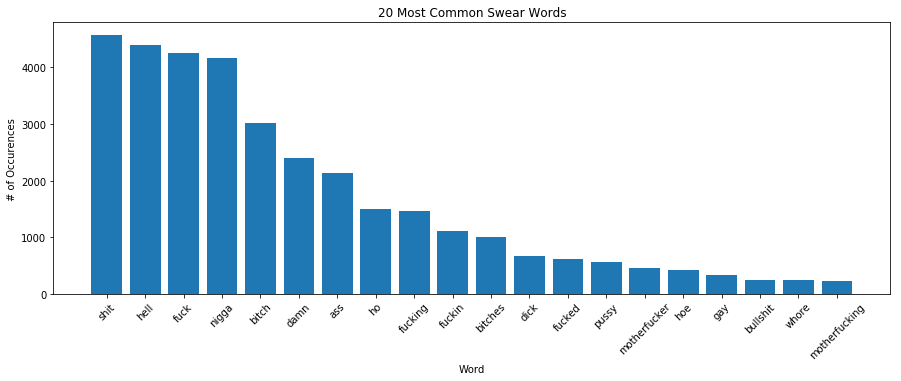

In [20]:
plt.subplots(figsize=(15,5))
counter=dict([(col, sum(profanity_tm[col])) for col in profanity_tm.columns if sum(profanity_tm[col])>0])
counter=sorted(counter.items(), key=lambda x: x[1], reverse=True)[:20]
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)), [x[0] for x in counter], rotation=45)
plt.title('20 Most Common Swear Words')
plt.ylabel('# of Occurences')
plt.xlabel('Word')
plt.show()


It may be more informative to stem words such as...
* shit, bullshit
* fuck, fucking, fuckin, fucked
* bitch, bitches
* nigga, niggas

In [21]:
def cons_cols(df, cols, new_col):
    new=df.loc[:,cols].sum(axis=1)
    df.drop(cols, axis=1, inplace=True)
    df[new_col]=new

In [23]:
for term in ['shit','fuck','ass','bitch','nigg', 'damn', 'piss', 'cock', 'cunt', 'dick', 'fag', 'gay', 'arse']:
    cons_cols(profanity_tm, [x for x in profanity_tm.columns if term in x], term)
profanity_tm

,anus,axwound,bampot,bastard,beaner,blow job,blowjob,bollocks,bollox,boner,...,bitch,nigg,damn,piss,cock,cunt,dick,fag,gay,arse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


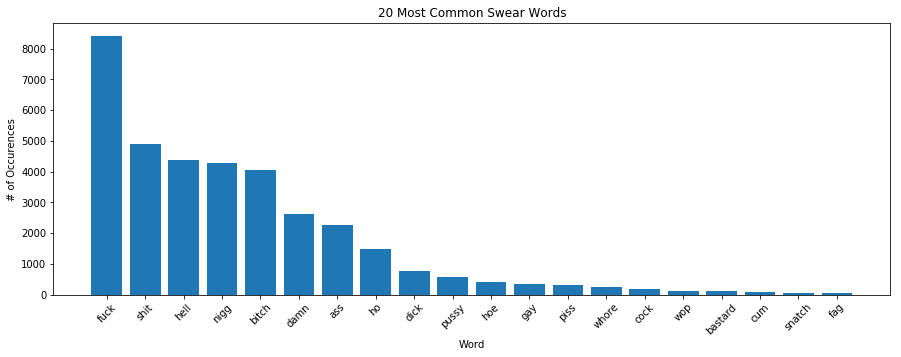

In [24]:
plt.subplots(figsize=(15,5))
counter=dict([(col, sum(profanity_tm[col])) for col in profanity_tm.columns if sum(profanity_tm[col])>0])
counter=sorted(counter.items(), key=lambda x: x[1], reverse=True)[:20]
plt.bar(np.arange(len(counter)), [x[1] for x in counter])
plt.xticks(np.arange(len(counter)), [x[0] for x in counter], rotation=45)
plt.title('20 Most Common Swear Words')
plt.ylabel('# of Occurences')
plt.xlabel('Word')
plt.savefig('../Figures/profane_words.pdf')
plt.show()

## Profanity over time
Slang (including profane slang) changes with society over time. Common curse words of today are not necessarily the words of choice from previous decades. We would like observe such trends over time.

In [25]:
profanity_byyear=profanity_tm.copy()
profanity_byyear['release_date']=song_df.release_date
profanity_byyear.dropna(inplace=True)
profanity_byyear.release_date=profanity_byyear.release_date.astype(int)
profanity_byyear=profanity_byyear.query("release_date>=1970 & release_date<2017")
profanity_byyear=profanity_byyear.groupby('release_date').sum()
profanity_byyear

,anus,axwound,bampot,bastard,beaner,blow job,blowjob,bollocks,bollox,boner,...,bitch,nigg,damn,piss,cock,cunt,dick,fag,gay,arse
release_date,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,2,2,0
1971,0,0,0,0,0,0,0,0,0,0,...,2,0,7,0,0,0,3,0,1,0
1972,0,0,0,0,0,0,0,0,0,0,...,1,12,9,0,0,1,0,0,4,0
1973,0,0,0,1,0,0,0,0,0,0,...,3,0,7,0,1,0,0,0,1,0
1974,0,0,0,0,0,0,0,0,0,0,...,3,1,6,0,0,0,0,1,3,0
1975,0,0,0,0,0,0,0,0,0,0,...,5,0,6,0,0,0,1,0,2,0
1976,0,0,0,0,0,0,0,0,0,0,...,2,1,11,1,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,11,3,0,0,0,0,0,0
1978,0,0,0,1,0,0,0,0,0,0,...,2,0,11,2,0,1,0,1,1,1


In [26]:
songs_per_year=song_df.query("release_date>=1970 & release_date<2017").groupby('release_date').size()

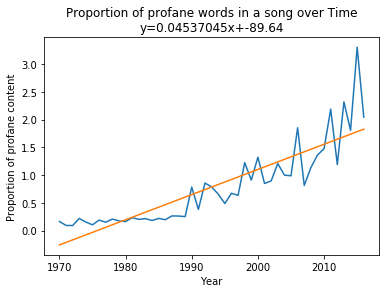

In [27]:
temp=profanity_byyear.sum(axis=1).div(songs_per_year)
plt.plot(temp.index,temp)
slope, intercept, r_value, p_value, std_err = linregress(temp.index,temp)
plt.plot(temp.index,[slope*x + intercept for x in temp.index])
line_eq='y={}x+{}'.format(round(slope,8),round(intercept,3))
plt.title('Proportion of profane words in a song over Time\n{}'.format(line_eq))
plt.xlabel('Year')
plt.ylabel('Proportion of profane content')
plt.savefig('../Figures/profanity_overtime.pdf')

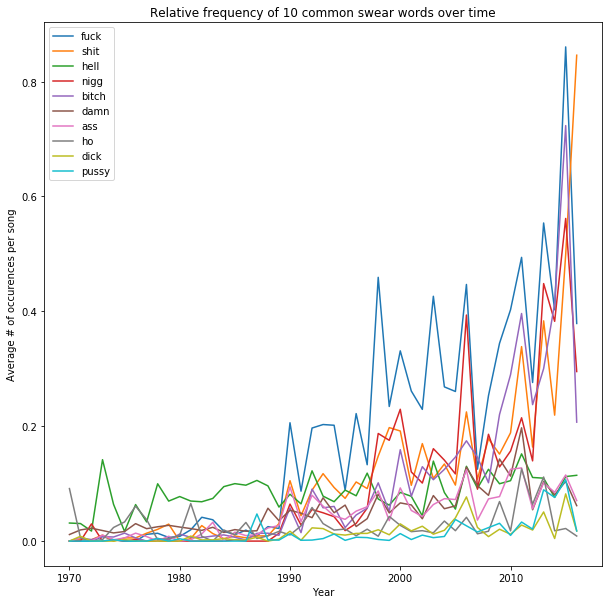

In [28]:
prof_shortlist=[x[0] for x in counter][:10]

plt.subplots(figsize=(10,10))
for i,word in enumerate(prof_shortlist):
    temp=profanity_byyear[word].div(songs_per_year)
    temp.fillna(0,inplace=True)
    plt.plot(temp.index, temp, label=word)
plt.legend()
plt.title("Relative frequency of 10 common swear words over time")
plt.xlabel("Year")
plt.ylabel("Average # of occurences per song")
plt.show()

As you can see, *shit* has really hit the fan.

We can also look at the most popular swear words for each 5-year period.

In [30]:
for year in range(1970,2020,10):
    temp=profanity_byyear.query("{} <= release_date < {}".format(year, year+10))
    counter=dict([(col, sum(temp[col])) for col in temp.columns if sum(temp[col])>0])
    counter=sorted(counter.items(), key=lambda x: x[1], reverse=True)[:10]
    print("{} to {}".format(year, year+9), [x[0] for x in counter])

1970 to 1979 ['hell', 'ho', 'damn', 'shit', 'ass', 'fuck', 'bitch', 'gay', 'nigg', 'muff']
1980 to 1989 ['hell', 'damn', 'fuck', 'ho', 'ass', 'shit', 'bitch', 'pussy', 'piss', 'wop']
1990 to 1999 ['fuck', 'shit', 'hell', 'nigg', 'ass', 'bitch', 'damn', 'ho', 'dick', 'hoe']
2000 to 2009 ['fuck', 'nigg', 'shit', 'bitch', 'hell', 'damn', 'ass', 'dick', 'ho', 'hoe']
2010 to 2019 ['fuck', 'bitch', 'shit', 'nigg', 'hell', 'damn', 'ass', 'ho', 'pussy', 'dick']


## Profanity by Genre
The occurrence of swearing also differs from one genre to another

In [31]:
prof_by_genre=profanity_tm.copy()
prof_by_genre['genre']=song_df.genre
prof_by_genre=prof_by_genre.groupby('genre').sum()
prof_by_genre

,anus,axwound,bampot,bastard,beaner,blow job,blowjob,bollocks,bollox,boner,...,bitch,nigg,damn,piss,cock,cunt,dick,fag,gay,arse
genre,,,,,,,,,,,,,,,,,,,,,
Blues,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
Classical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
Country,0,0,0,0,0,0,0,0,0,0,...,43,0,47,0,9,1,17,0,8,0
Electronic,0,0,0,0,0,0,0,0,0,0,...,4,0,5,0,0,0,1,0,0,0
Folk,0,0,0,6,0,0,0,0,0,0,...,2,0,16,0,0,0,0,0,2,1
Gospel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Hip-Hop/Rap,2,0,0,7,0,0,0,0,0,0,...,2233,2836,592,43,55,2,300,13,5,0
Holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,20,0
Jazz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,17,0


The following shows profanity distributed among genres. We notice Hip-Hop has by far the most profanity.

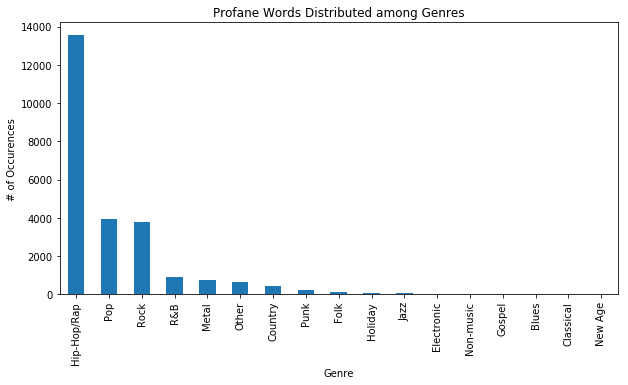

In [32]:
prof_by_genre.sum(axis=1).sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title('Profane Words Distributed among Genres')
plt.xlabel('Genre')
plt.ylabel('# of Occurences')
plt.savefig('../Figures/profanity_bygenre.pdf')

The following shows the top 10 swear words distributed among genres. We can see that 'n\*\*\*a' is most common in rap.

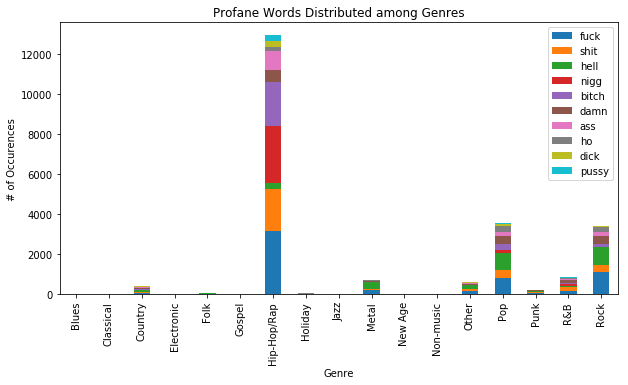

In [33]:
prof_by_genre.loc[:,prof_shortlist].plot.bar(stacked=True, figsize=(10,5))
plt.title('Profane Words Distributed among Genres')
plt.xlabel('Genre')
plt.ylabel('# of Occurences')
plt.savefig('../Figures/profanity10_bygenre.pdf')

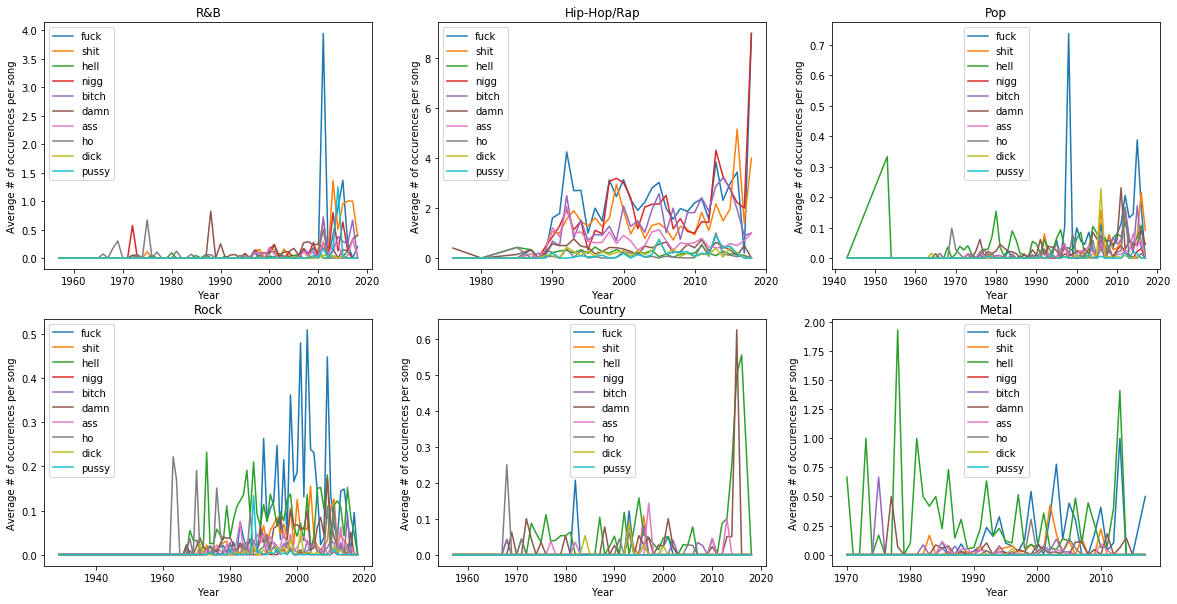

In [41]:
profanity_byyear=profanity_tm.copy()
profanity_byyear['release_date']=song_df.release_date

plt.subplots(figsize=(20,10))

for i,genre in enumerate({'Pop','Rock','Hip-Hop/Rap','R&B','Country','Metal'}):
    temp_genre=profanity_byyear.loc[song_df.genre==genre].groupby('release_date').sum()
    songs_per_year=pd.Series(Counter(song_df.query("genre == '{}'".format(genre)).release_date))
    
    plt.subplot(2,3,i+1)
    for i,word in enumerate(prof_shortlist):
        temp=temp_genre[word].div(songs_per_year)
        temp.fillna(0,inplace=True)
        #temp=temp[22:]
        plt.plot(temp.index, temp, label=word)
    plt.legend()
    plt.title("{}".format(genre))
    plt.xlabel("Year")
    plt.ylabel("Average # of occurences per song")
    
plt.show()

WE can see that 'hell' has always been the popular choice in Metal music, which n\*\*\*a has become more and more popular in Rap, probably due to the increase in black rappers.

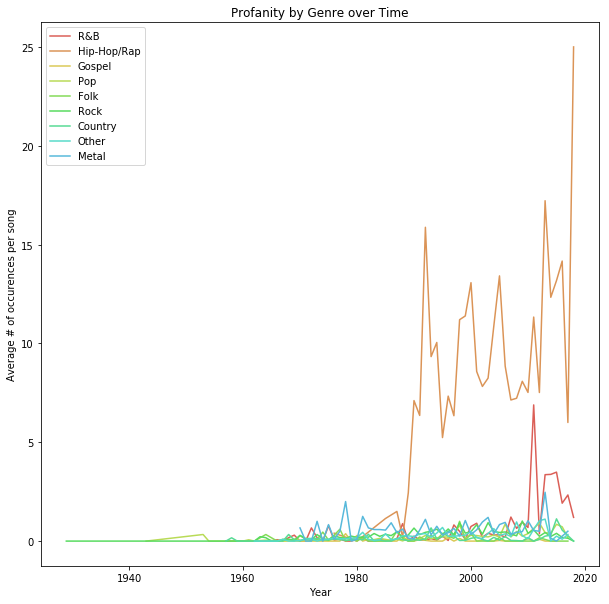

In [43]:
palette=sns.color_palette('hls',len(set(song_df.genre)-{'Other', 'Non-music', np.nan}))
plt.subplots(figsize=(10,10))

for i,genre in enumerate({'Pop','Rock','Country','Other','R&B','Hip-Hop/Rap','Metal','Folk','Gospel'}):
    temp=profanity_byyear.loc[song_df.genre==genre].groupby('release_date').sum()
    songs_per_year=pd.Series(Counter(song_df.query("genre == '{}'".format(genre)).release_date))
    temp=temp.sum(axis=1).div(songs_per_year)
    temp.fillna(0,inplace=True)
    plt.plot(temp.index, temp, label=genre, c=palette[i])
plt.legend()
plt.title("Profanity by Genre over Time")
plt.xlabel("Year")
plt.ylabel("Average # of occurences per song")
    
plt.show()

## By Artist
We can also look at who swears the most. Many rapper are known to swear a lot in their songs. 

In [45]:
profanity_byartist=profanity_tm.copy()
profanity_byartist['artist']=song_df.artist
profanity_byartist=profanity_byartist.groupby('artist').sum()

In [46]:
sorted(profanity_byartist.sum(axis=1).items(), key=lambda x: x[1], reverse=True)[:20]

[('Lil Wayne', 1842),
 ('Insane Clown Posse', 1640),
 ('Ice Cube', 1364),
 ('Snoop Dogg', 1040),
 ('Drake', 938),
 ('J Cole', 831),
 ('Young Jeezy', 792),
 ('Eminem', 782),
 ('Gucci Mane', 781),
 ('Ying Yang Twins', 779),
 ('Fabolous', 777),
 ('Notorious B.I.G.', 775),
 ('Korn', 699),
 ('Z-Ro', 692),
 ('Chris Brown', 685),
 ('Nicki Minaj', 582),
 ('Xzibit', 565),
 ('Kanye West', 564),
 ('Kid Rock', 472),
 ('Wu-Tang Clan', 462)]